In [1]:
import pandas as pd


In [2]:
dataframe=pd.read_csv("data_table.csv")

In [3]:
print(dataframe.shape)
print(dataframe.isnull().sum())

(6362620, 11)
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
print(dataframe['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [5]:
dataframe[dataframe['isFraud']==1]["type"].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [6]:
dataframe = pd.get_dummies(
    dataframe,
    columns=['type']
)

this will drop one of the type_* column and then arranges the other this is because drop_first=True<br>
if this drop_table is absent then all columns will be present

In [7]:
dataframe.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [8]:
col=['type_PAYMENT','type_DEBIT','type_CASH_IN']
dataframe.drop(columns=col,inplace=True)

here i have removed the columns <br> type_PAYMENT <br> type_DEBIT <br> type_CASH_IN <br> this is becuase if fraud occured then these columns have a value of 0 so there is no need of these

In [9]:
dataframe['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
dataframe.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_TRANSFER'],
      dtype='object')

above we can see the columns are dropped

In [11]:
count=dataframe['isFraud'].value_counts()
categories=count.index.to_numpy()
values=count.to_numpy()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 2 artists>

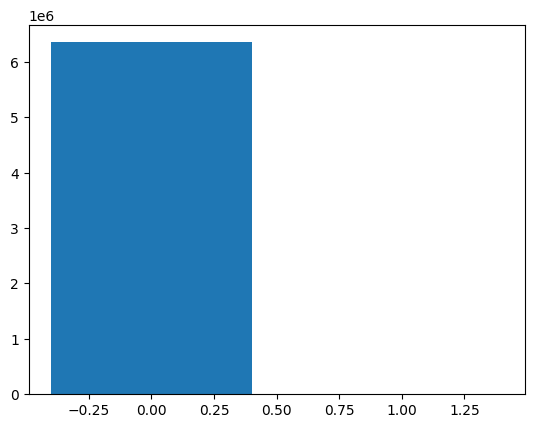

In [13]:
plt.bar(categories,values)

In [14]:
dataframe.drop_duplicates()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,True


In [15]:
dataframe['orgdiffbalance']=dataframe['oldbalanceOrg']-dataframe['newbalanceOrig']
dataframe['destdiffbalance']=dataframe['oldbalanceDest']-dataframe['newbalanceDest']


In [16]:
dataframe.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_TRANSFER', 'orgdiffbalance',
       'destdiffbalance'],
      dtype='object')

In [17]:
dataframe[dataframe['orgdiffbalance']<0]

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER,orgdiffbalance,destdiffbalance
389,1,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0,False,False,-143236.26,511668.39
390,1,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0,False,False,-228451.89,-466878.43
391,1,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0,False,False,-35902.50,49003.30
392,1,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0,False,False,-232953.63,-344589.89
393,1,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0,False,False,-65912.95,80154.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0,False,False,-188888.89,0.00
6362271,718,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0,False,False,-27919.60,27919.61
6362279,718,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0,False,False,-78988.38,78988.38
6362298,718,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0,False,False,-18000.26,18000.27


In [18]:
large_fraud=dataframe[
    (dataframe["isFraud"]==1) &
    (dataframe['isFlaggedFraud']==1)
]

large_fraud


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER,orgdiffbalance,destdiffbalance
2736446,212,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,False,True,0.0,0.0
3247297,250,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,False,True,0.0,0.0
3760288,279,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,False,True,0.0,0.0
5563713,387,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,False,True,0.0,0.0
5996407,425,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,False,True,0.0,0.0
5996409,425,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,False,True,0.0,0.0
6168499,554,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,False,True,0.0,0.0
6205439,586,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,False,True,0.0,0.0
6266413,617,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,False,True,0.0,0.0
6281482,646,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,False,True,0.0,0.0


In [19]:
print(large_fraud.shape)

(16, 14)


fraud is done when the type is transfer  or cashout <br>
this means when the user is trying to take the money out of his account scamers trying to steal it

In [20]:
dataframe['merchant'] = dataframe['nameDest'].str.startswith('M').astype('int8')

In [21]:

dataframe['hour']=dataframe['step']%24
dataframe['day']=dataframe['step']//24

In [22]:
dataframe

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER,orgdiffbalance,destdiffbalance,merchant,hour,day
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,9839.64,0.00,1,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,1864.28,0.00,1,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,True,181.00,0.00,0,1,0
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False,181.00,21182.00,0,1,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,11668.14,0.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,339682.13,-339682.13,0,23,30
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,True,6311409.28,0.00,0,23,30
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False,6311409.28,-6311409.27,0,23,30
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,True,850002.52,0.00,0,23,30


In [23]:
dataframe['orig_delta'] = dataframe['oldbalanceOrg'] - dataframe['newbalanceOrig']
dataframe['dest_delta'] = dataframe['newbalanceDest'] - dataframe['oldbalanceDest']


In [24]:
dataframe.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_TRANSFER', 'orgdiffbalance',
       'destdiffbalance', 'merchant', 'hour', 'day', 'orig_delta',
       'dest_delta'],
      dtype='object')

In [25]:
drop_cols = [
    'step',
    'nameOrig',
    'nameDest',
    'isFlaggedFraud',
    'orig_delta',
    'dest_delta'
]

dataframe_train = dataframe.drop(columns=drop_cols)


In [26]:

dataframe_train=dataframe_train.astype('int')

In [27]:
dataframe_train.dtypes

amount             int32
oldbalanceOrg      int32
newbalanceOrig     int32
oldbalanceDest     int32
newbalanceDest     int32
isFraud            int32
type_CASH_OUT      int32
type_TRANSFER      int32
orgdiffbalance     int32
destdiffbalance    int32
merchant           int32
hour               int32
day                int32
dtype: object

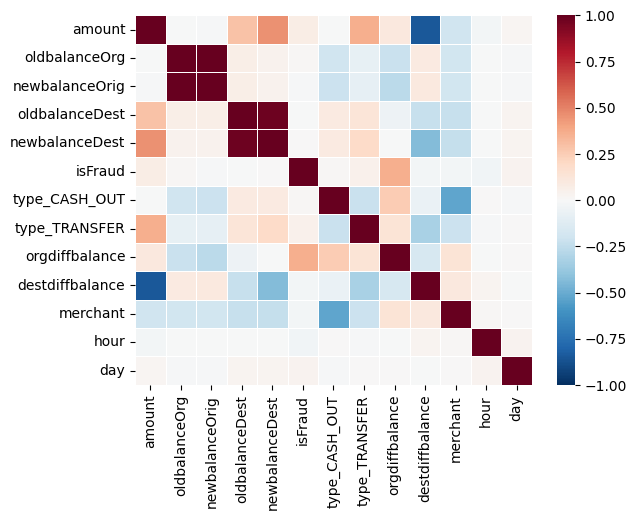

In [28]:
correlation=dataframe_train.corr()
sns.heatmap(
    correlation,
    cmap="RdBu_r",     
    vmin=-1, vmax=1,   
    center=0,          
    annot=False,
    linewidths=0.5
)
plt.show()

In [29]:
correlation

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER,orgdiffbalance,destdiffbalance,merchant,hour,day
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,-0.004376,0.365896,0.102337,-0.845964,-0.197444,-0.029676,0.023307
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066242,0.042029,0.010154,-0.200899,-0.081593,-0.220296,0.087032,-0.189486,-0.001015,-0.010042
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,-0.210977,-0.087355,-0.267749,0.094456,-0.193915,-0.000858,-0.010288
oldbalanceDest,0.294137,0.066242,0.067812,1.000000,0.976569,-0.005885,0.086028,0.130476,-0.047460,-0.232316,-0.231455,-0.001564,0.027752
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,0.093476,0.191701,-0.006451,-0.436191,-0.238315,-0.006697,0.026128
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.011256,0.053869,0.362472,-0.027028,-0.025697,-0.031403,0.032577
type_CASH_OUT,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,1.000000,-0.222672,0.250010,-0.062758,-0.526422,0.002072,-0.012999
type_TRANSFER,0.365896,-0.081593,-0.087355,0.130476,0.191701,0.053869,-0.222672,1.000000,0.134808,-0.320839,-0.216110,-0.008181,0.007184
orgdiffbalance,0.102337,-0.220296,-0.267749,-0.047460,-0.006451,0.362472,0.250010,0.134808,1.000000,-0.169292,0.134575,-0.002880,0.007353
destdiffbalance,-0.845964,0.087032,0.094456,-0.232316,-0.436191,-0.027028,-0.062758,-0.320839,-0.169292,1.000000,0.109286,0.023730,-0.002048


In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   amount           float64
 2   nameOrig         object 
 3   oldbalanceOrg    float64
 4   newbalanceOrig   float64
 5   nameDest         object 
 6   oldbalanceDest   float64
 7   newbalanceDest   float64
 8   isFraud          int64  
 9   isFlaggedFraud   int64  
 10  type_CASH_OUT    bool   
 11  type_TRANSFER    bool   
 12  orgdiffbalance   float64
 13  destdiffbalance  float64
 14  merchant         int8   
 15  hour             int64  
 16  day              int64  
 17  orig_delta       float64
 18  dest_delta       float64
dtypes: bool(2), float64(9), int64(5), int8(1), object(2)
memory usage: 794.9+ MB


In [31]:
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column           Dtype
---  ------           -----
 0   amount           int32
 1   oldbalanceOrg    int32
 2   newbalanceOrig   int32
 3   oldbalanceDest   int32
 4   newbalanceDest   int32
 5   isFraud          int32
 6   type_CASH_OUT    int32
 7   type_TRANSFER    int32
 8   orgdiffbalance   int32
 9   destdiffbalance  int32
 10  merchant         int32
 11  hour             int32
 12  day              int32
dtypes: int32(13)
memory usage: 315.5 MB


In [32]:
dataframe[dataframe['isFraud']==1][['type_CASH_OUT','type_TRANSFER']]

,type_CASH_OUT,type_TRANSFER
2,False,True
3,True,False
251,False,True
252,True,False
680,False,True
...,...,...
6362615,True,False
6362616,False,True
6362617,True,False
6362618,False,True


In [33]:
dataframe_X=dataframe_train.drop(columns=['isFraud'])
dataframe_y=dataframe_train['isFraud']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe_X, dataframe_y, test_size=.25, random_state=42)

In [35]:
y_train.value_counts()

isFraud
0    4765797
1       6168
Name: count, dtype: int64

In [36]:
y_test.value_counts()

isFraud
0    1588610
1       2045
Name: count, dtype: int64

so we have to oversample the training data.

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42,sampling_strategy='minority')

In [38]:
y_train.value_counts()

isFraud
0    4765797
1       6168
Name: count, dtype: int64

In [39]:
X_train,y_train=smote.fit_resample(X_train,y_train)

In [40]:
y_train.value_counts()

isFraud
0    4765797
1    4765797
Name: count, dtype: int64

the above is to prove that the dataset is now balanced

In [41]:
X_train.shape[0]==y_train.shape[0]

True

above is to check the number of rows match or not

### machine learning starts here

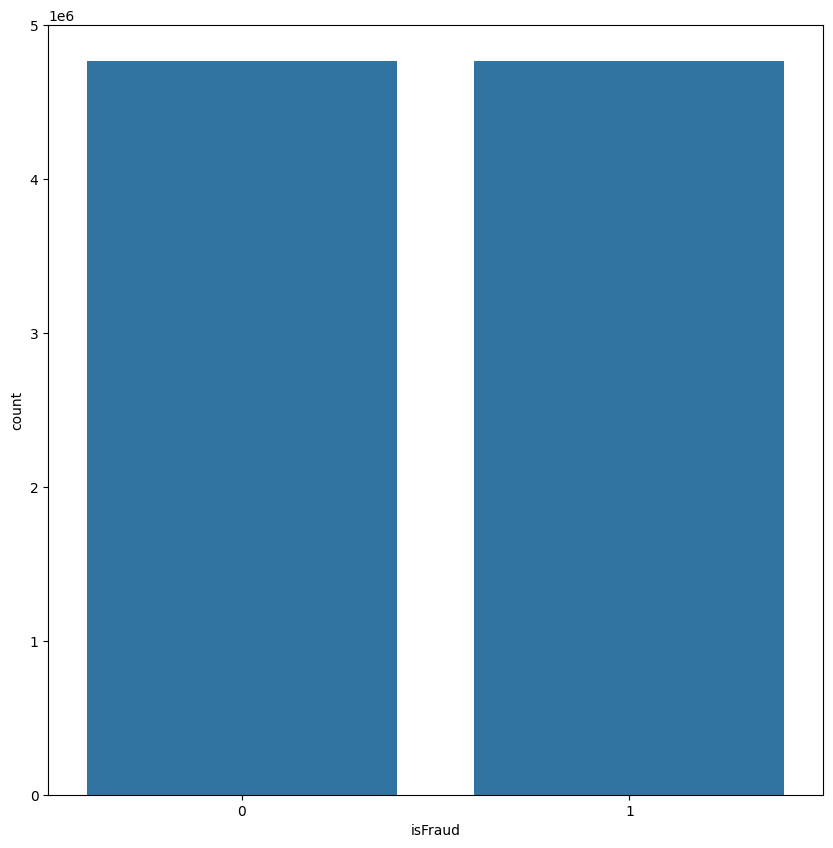

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x=y_train)
plt.show()

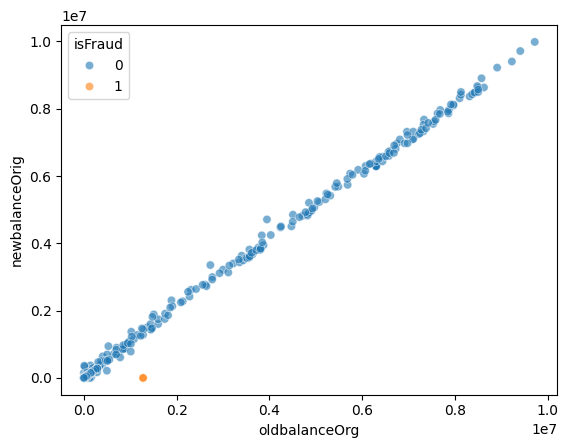

In [43]:
sns.scatterplot(data=dataframe_train.head(1000),x='oldbalanceOrg',
    y='newbalanceOrig',
    hue='isFraud',
    alpha=0.6)
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
X_scaled_train=scaler.fit_transform(X_train)

In [47]:
x_scaled_test=scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic=LogisticRegression(class_weight='balanced',
                        max_iter=1000)
logistic.fit(X_scaled_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( 
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
tree.fit(X_scaled_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            n_jobs=2,          # ⚠️ limit CPU
            verbose=1          # ✅ shows progress
        )

rf_params = {
            "n_estimators": [50, 100],
            "max_depth": [8, 12],
            "min_samples_leaf": [20, 50]
        }

rf_search = RandomizedSearchCV(
            rf_base,
            rf_params,
            n_iter=3,          # ⚠️ lightweight
            scoring="recall",
            cv=3,
            verbose=2,
            n_jobs=2
        )

rf_search.fit(X_scaled_train,y_train)
forest = rf_search.best_estimator_



y_pred_forest=rf_search.predict(x_scaled_test)
percentage_forest=sum(y_pred_forest==y_test)/len(y_test)*100
print(f"Random Forest Test Accuracy: {percentage_forest:.2f}%")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
    max_depth=10,
    n_estimators=200,
    random_state=42
)
xgb.fit(X_scaled_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred_logistic=logistic.predict(X_test)

c:\Users\bhask\Downloads\fraud_detection\projectenv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
percent_logistic=(y_pred_logistic==y_test).sum()/y_test.shape[0]*100
print("percent of logistic regression:",percent_logistic)

percent of logistic regression: 63.95824361662334


In [ ]:
y_pred_tree=tree.predict(X_test)
percent_tree=(y_pred_tree==y_test).sum()/y_test.shape[0]*100
print("percent of tree:",percent_tree)

percent of tree: 99.87143660944704


c:\Users\bhask\Downloads\fraud_detection\projectenv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_pred_xgb=xgb.predict(X_test)
percent_xgb=(y_pred_xgb==y_test).sum()/y_test.shape[0]*100
print("percent of xgb:",percent_xgb)

percent of xgb: 42.5020510418664


by the above thing we can chose decision tree 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78   1588610
           1       0.00      0.97      0.01      2045

    accuracy                           0.64   1590655
   macro avg       0.50      0.80      0.39   1590655
weighted avg       1.00      0.64      0.78   1590655



In [ ]:
print(classification_report(y_test,y_pred_tree))

c:\Users\bhask\Downloads\fraud_detection\projectenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\bhask\Downloads\fraud_detection\projectenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.00      0.00      0.00      2045

    accuracy                           1.00   1590655
   macro avg       0.50      0.50      0.50   1590655
weighted avg       1.00      1.00      1.00   1590655



c:\Users\bhask\Downloads\fraud_detection\projectenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.42      0.60   1588610
           1       0.00      0.99      0.00      2045

    accuracy                           0.43   1590655
   macro avg       0.50      0.71      0.30   1590655
weighted avg       1.00      0.43      0.60   1590655



In [ ]:
from sklearn.metrics import mean_absolute_error,average_precision_score,mean_squared_error



In [ ]:
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
mae_logistic=mean_absolute_error(y_test,y_pred_logistic)
mae_tree=mean_absolute_error(y_test,y_pred_tree)

print("MAE of XGB:",mae_xgb)
print("MAE of Logistic:",mae_logistic)
print("MAE of Tree:",mae_tree)  

MAE of XGB: 0.574979489581336
MAE of Logistic: 0.3604175638337666
MAE of Tree: 0.0012856339055294832


In [ ]:
avg_xgb=mean_squared_error(y_test,y_pred_xgb)
avg_logistic=mean_squared_error(y_test,y_pred_logistic)        
avg_tree=mean_squared_error(y_test,y_pred_tree)
print("Average precision score of XGB:",avg_xgb)
print("Average precision score of Logistic:",avg_logistic)  
print("Average precision score of Tree:",avg_tree)

Average precision score of XGB: 0.574979489581336
Average precision score of Logistic: 0.3604175638337666
Average precision score of Tree: 0.0012856339055294832


In [ ]:
import joblib

joblib.dump(logistic,'logistic_model.pkl')
joblib.dump(tree,'tree_model.pkl')
joblib.dump(forest,'forest_model.pkl')  

['forest_model.pkl']